<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/regr_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  2 of 2 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

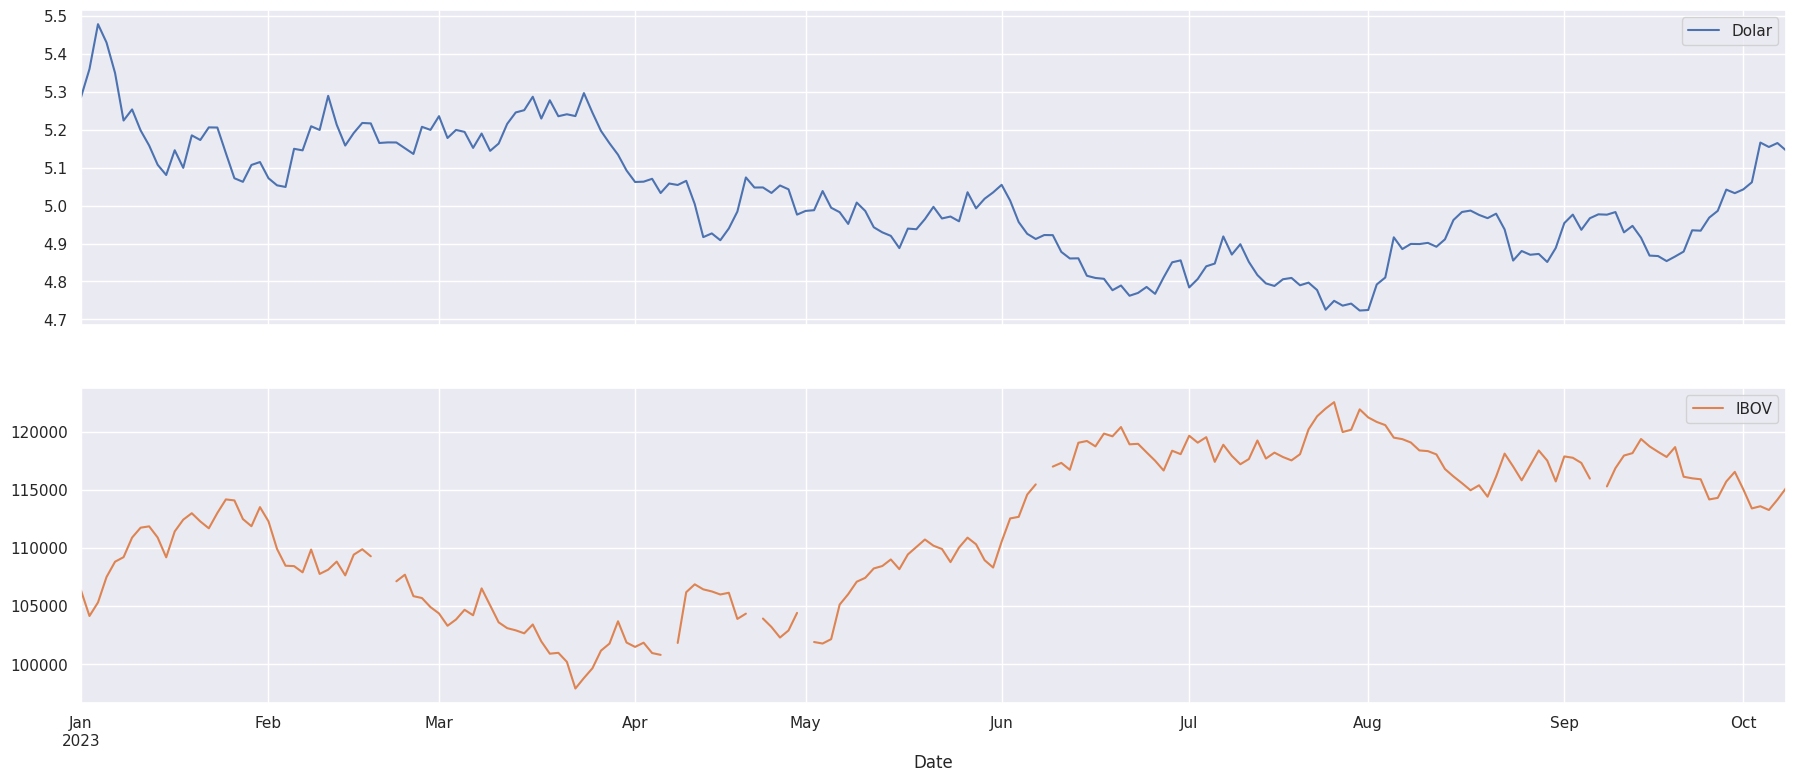

In [91]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2023-01-01", end="2023-10-10")["Close"]
carteira.columns = ["Dolar", "IBOV"]


# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))



Dolar    194
IBOV     194
dtype: int64

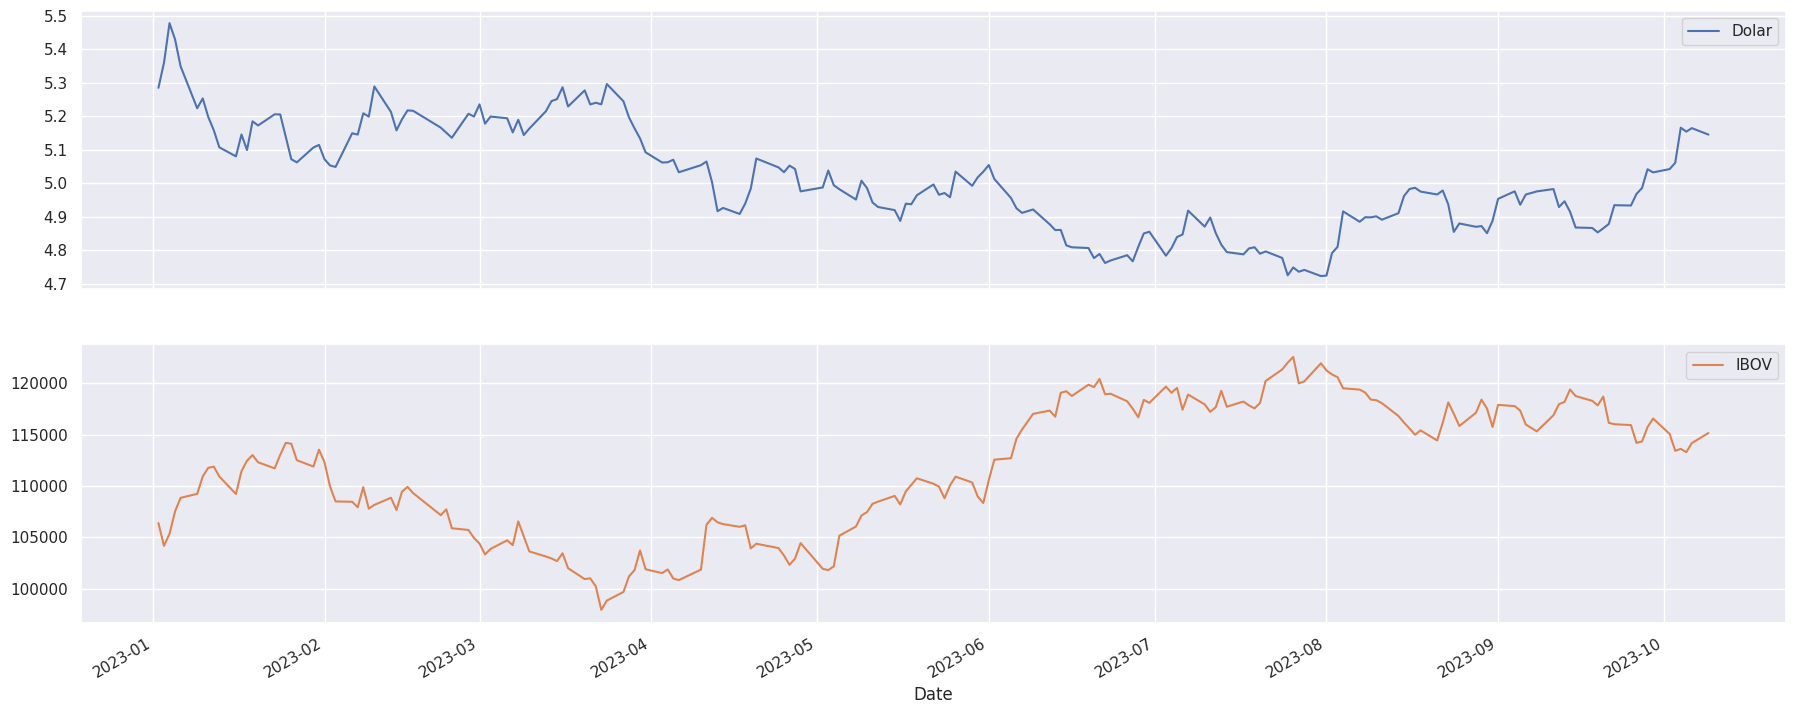

In [92]:
# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))
carteira.head()
carteira.count()

<Axes: >

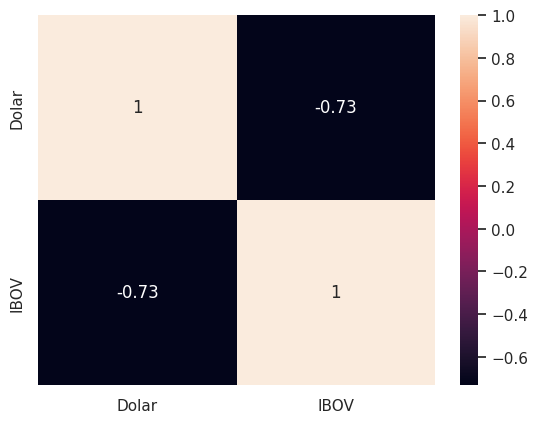

In [93]:
sns.heatmap(carteira.corr(), annot=True)

Média Dólar: 5.0104, Desvio Padrão Dólar: 0.1595
Média IBOV: 111753.9897, Desvio Padrão IBOV: 6312.6637

Coeficientes de Regressão:
[256684.02666314 -28925.69592586]

Matriz de Correlação:
          Dolar      IBOV
Dolar  1.000000 -0.730834
IBOV  -0.730834  1.000000

Correlações de Partes:
          Dolar      IBOV
Dolar  1.000000 -0.730834
IBOV  -0.730834  1.000000

Correlações Parciais:
[1.79948548e-65 1.11810025e-33]

Múltiplo R (R²): 0.5341
R² Ajustado: 0.5317
Mudança em R²: 0.0024
Erro Padrão da Tabela de Estimativa: 18661970.3427
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     220.1
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.12e-33
Time:                        01:35:33   Log-Likelihood:        

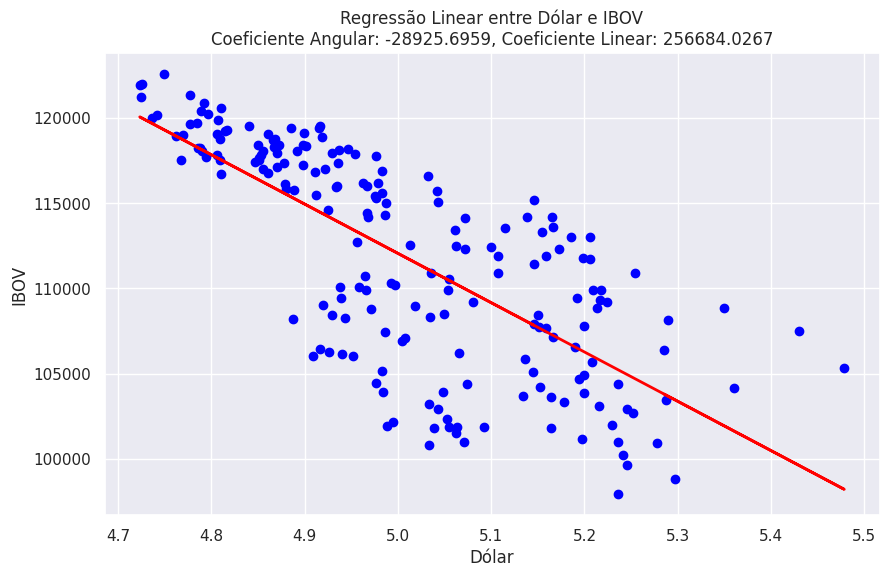

In [98]:
import statsmodels.api as sm
# Estatísticas descritivas
media_dolar = carteira["Dolar"].mean()
desvio_padrao_dolar = carteira["Dolar"].std()
media_ibov = carteira["IBOV"].mean()
desvio_padrao_ibov = carteira["IBOV"].std()

# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

X = sm.add_constant(X)  # Adicionar uma constante para o termo linear

model = sm.OLS(y, X).fit()

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = carteira.corr()
correlacao_partes = carteira.corr(method='pearson')
correlacoes_parciais = model.pvalues

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid


valores_previstos = model.fittedvalues
residuos = model.resid

# Exibindo estatísticas
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais:")
print(correlacoes_parciais)

print(f"\nMúltiplo R (R²): {r_squared:.4f}")
print(f"R² Ajustado: {r_squared_adj:.4f}")
print(f"Mudança em R²: {change_r_squared:.4f}")
print(f"Erro Padrão da Tabela de Estimativa: {std_error:.4f}")
print(model.summary())
print("\nAnálise de Variância:")


print("\nValores Previstos:")
print(valores_previstos)

print("\nResíduos:")
print(residuos)

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()

